In [0]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, AveragePooling2D
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train.shape

(60000, 28, 28)

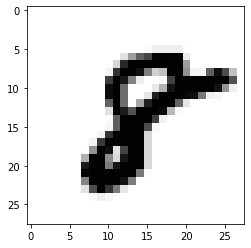

In [0]:
plt.imshow(x_train[45678], cmap='Greys')

## "Simple" Neural Network

In [0]:
x_train_plain = x_train.reshape(x_train.shape[0], -1).astype('float32')
x_test_plain = x_test.reshape(x_test.shape[0], -1).astype('float32')
x_train_plain /= 255
x_test_plain /= 255

In [0]:
nn = Sequential()
nn.add(Dense(128, activation='relu', input_shape=(28*28,)))
nn.add(Dropout(0.2))
nn.add(Dense(128, activation='relu'))
nn.add(Dropout(0.2))
nn.add(Dense(10,activation='softmax'))
nn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [0]:
nn.fit(x=x_train_plain, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2995 - accuracy: 0.9098
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1465 - accuracy: 0.9557
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1134 - accuracy: 0.9655
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0972 - accuracy: 0.9701
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0828 - accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0734 - accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0682 - accuracy: 0.9783
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0662 - accuracy: 0.9787
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.9810
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.054

In [0]:
nn.evaluate(x_test_plain, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0890 - accuracy: 0.9742


[0.08899233490228653, 0.9742000102996826]

## Convolutional Neural Network  

In [0]:
# 3D => 4D
x_train_cnn = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test_cnn = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')
# normalization
x_train_cnn /= 255
x_test_cnn /= 255

In [0]:
cnn = Sequential()
cnn.add(Conv2D(28, kernel_size=(5,5), activation='relu', input_shape=(28,28,1)))
cnn.add(AveragePooling2D(pool_size=(2,2)))
cnn.add(Conv2D(28, kernel_size=(5,5), activation='relu'))
cnn.add(AveragePooling2D(pool_size=(2,2)))
cnn.add(Flatten())
#cnn.add(Dense(128, activation='relu'))
#cnn.add(Dropout(0.2))
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.4))
cnn.add(Dense(10,activation='softmax'))
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
cnn.fit(x=x_train_cnn, y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2404 - accuracy: 0.9267
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0861 - accuracy: 0.9741
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0637 - accuracy: 0.9813
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0506 - accuracy: 0.9851
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0410 - accuracy: 0.9876
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0347 - accuracy: 0.9894
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0294 - accuracy: 0.9906
Epoch 8/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0260 - accuracy: 0.9916
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0238 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.020

In [6]:
cnn.evaluate(x_test_cnn, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0235 - accuracy: 0.9929


[0.023505687713623047, 0.992900013923645]

neural network with 1 hidden layer:  
accuracy: around 98%
  
CNN with 2 convolutional layers + 1 hidden layer:  
accuracy: 99.3% !!!!!

Predicted result:  9


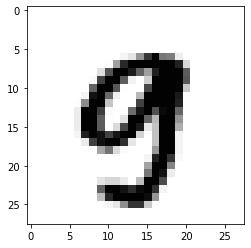

In [8]:
plt.imshow(x_test[4321], cmap='Greys')
pred = cnn.predict(x_test_cnn[4321].reshape(1,28,28,1))
print("Predicted result: ", pred.argmax())